# Explore here

In [46]:
# Your code here


Step 1: Problem statement and data collection

In [47]:
import pandas as pd
import csv
import os

train_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
test_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")

os.makedirs("/workspaces/machine-learning-python-template/data/raw", exist_ok=True)
file_path = os.path.join("/workspaces/machine-learning-python-template/data/raw", "AB_NYC_2019.csv")

with open(file_path, mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerows(train_data)

train_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Step 2: Exploration and data cleaning

In [48]:
train_data.shape

(48895, 16)

In [49]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

ELIMINATE IRRELEVANT INFORMATION

In [50]:
print(train_data.isnull().sum())
'''print(train_data.duplicated().sum())'''

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


'print(train_data.duplicated().sum())'

In [51]:
train_data.drop(columns=["id", "name", "host_name", "latitude", "longitude", "last_review"], axis = 1, inplace = True)
train_data.head()

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,Private room,150,3,0,NaN,1,365
3,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0


host_id     ->	Unique identifier for hosts for grouping

neighbourhood_group     ->	Location-based analysis

neighbourhood   ->	Detailed location info

room_type   ->	Important for understanding pricing trends

price	->	Important metric for analysis

minimum_nights	->	Useful for understanding rental policies

number_of_reviews	->	Indicates listing popularity

reviews_per_month   ->	Indicates activity level

calculated_host_listings_count	->	Shows how many listings a host has

availability_365    ->	Shows how many days per year the service is available

In [52]:
print(train_data.duplicated().sum())


181


In [53]:
train_data_clean = train_data.drop_duplicates()
train_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48714 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48714 non-null  int64  
 1   neighbourhood_group             48714 non-null  object 
 2   neighbourhood                   48714 non-null  object 
 3   room_type                       48714 non-null  object 
 4   price                           48714 non-null  int64  
 5   minimum_nights                  48714 non-null  int64  
 6   number_of_reviews               48714 non-null  int64  
 7   reviews_per_month               38829 non-null  float64
 8   calculated_host_listings_count  48714 non-null  int64  
 9   availability_365                48714 non-null  int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 4.1+ MB


Note how reviews_per_month has NaN values, we'll replace them with 0.

In [54]:
train_data_clean.loc[:, "reviews_per_month"] = train_data_clean["reviews_per_month"].fillna(0)

Step 3: Analysis of univariate variables

- host_id
- neighbourhood_group
- neighbourhood
- room_type

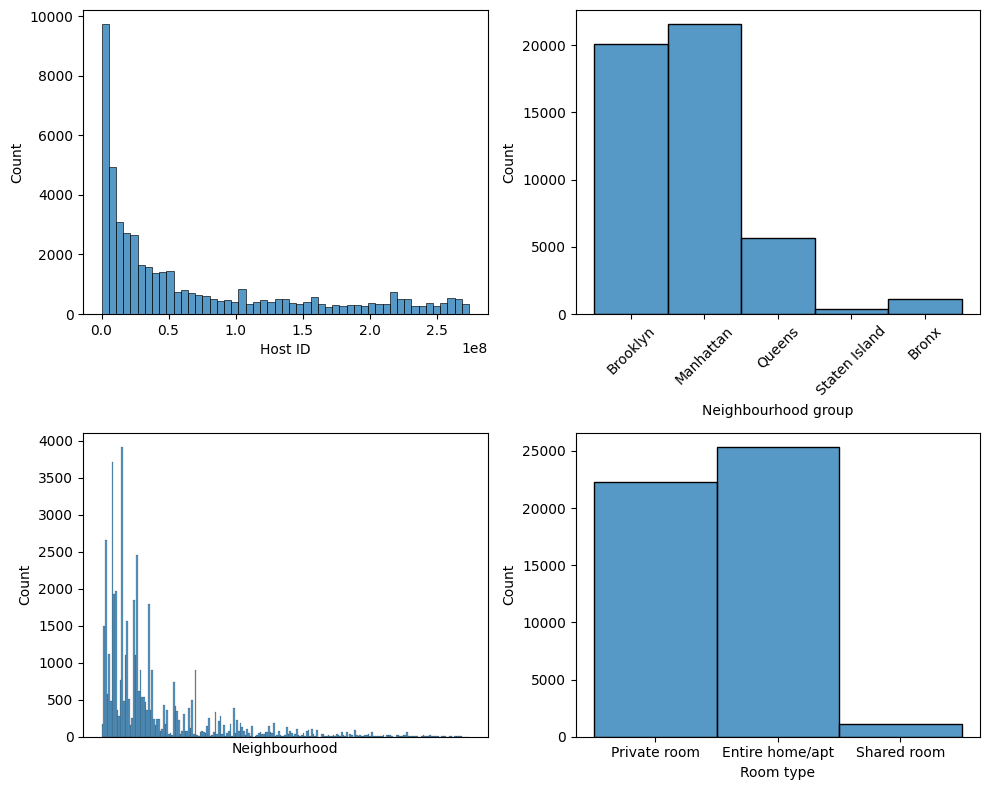

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 2, figsize = (10, 8))

sns.histplot(ax = axis[0,0], data = train_data_clean, x = "host_id").set(xlabel = "Host ID")
sns.histplot(ax = axis[0,1], data = train_data_clean, x = "neighbourhood_group").set(xlabel = "Neighbourhood group")
sns.histplot(ax = axis[1,0], data = train_data_clean, x = "neighbourhood").set(xlabel = "Neighbourhood")
sns.histplot(ax = axis[1,1], data = train_data_clean, x = "room_type").set(xlabel = "Room type")

axis[0, 1].tick_params(axis="x", rotation=45)
axis[1, 0].set_xticks([])

plt.tight_layout()
plt.show()


Numeric var.
- price
- minimum_nights
- number_of_reviews
- reviews_per_month    
- calculated_host_listings_count  
- availability_365                           

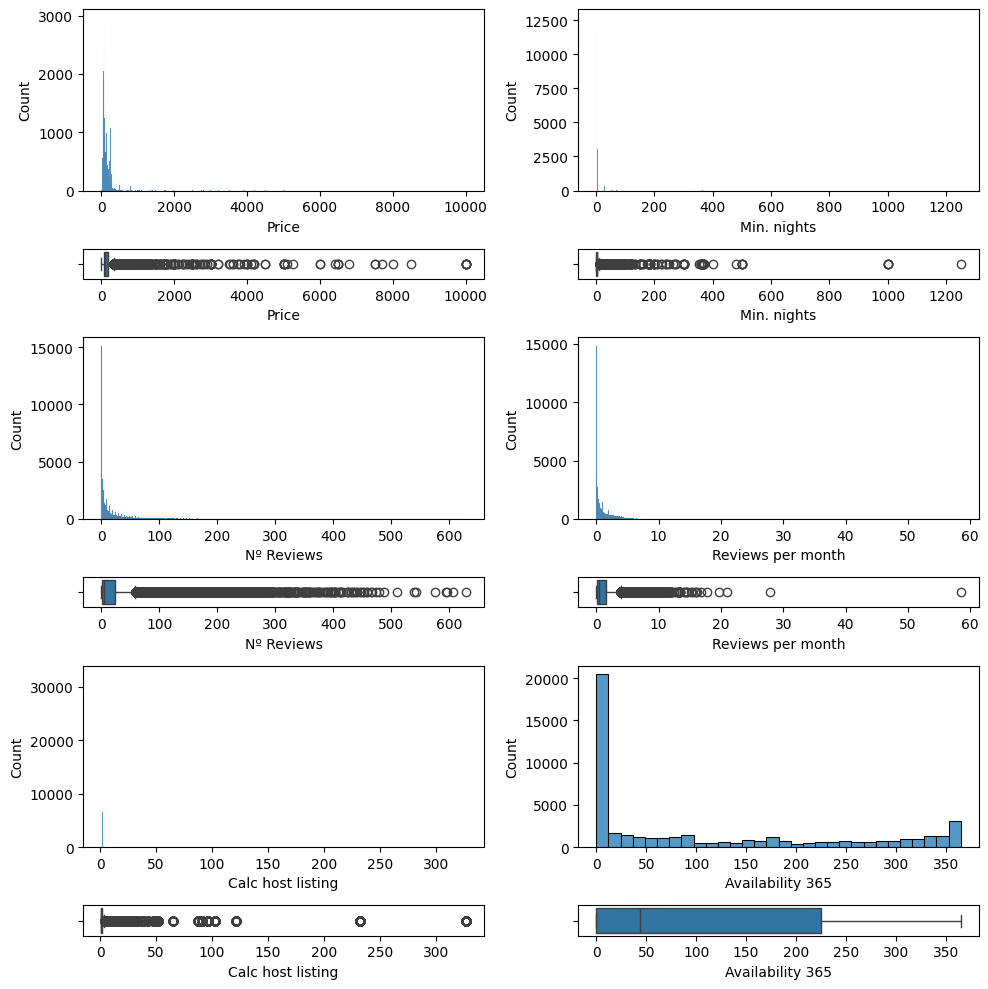

In [56]:

fig, axis = plt.subplots(6, 2, figsize = (10, 10), gridspec_kw={"height_ratios": [6, 1] * 3})

sns.histplot(ax = axis[0,0], data = train_data_clean, x = "price").set(xlabel = "Price")
sns.boxplot(ax = axis[1,0], data = train_data_clean, x = "price").set(xlabel = "Price")

sns.histplot(ax = axis[0,1], data = train_data_clean, x = "minimum_nights").set(xlabel = "Min. nights")
sns.boxplot(ax = axis[1,1], data = train_data_clean, x = "minimum_nights").set(xlabel = "Min. nights")

sns.histplot(ax = axis[2,0], data = train_data_clean, x = "number_of_reviews").set(xlabel = "Nº Reviews")
sns.boxplot(ax = axis[3,0], data = train_data_clean, x = "number_of_reviews").set(xlabel = "Nº Reviews")

sns.histplot(ax = axis[2,1], data = train_data_clean, x = "reviews_per_month").set(xlabel = "Reviews per month")
sns.boxplot(ax = axis[3,1], data = train_data_clean, x = "reviews_per_month").set(xlabel = "Reviews per month")

sns.histplot(ax = axis[4,0], data = train_data_clean, x = "calculated_host_listings_count").set(xlabel = "Calc host listing")
sns.boxplot(ax = axis[5,0], data = train_data_clean, x = "calculated_host_listings_count").set(xlabel = "Calc host listing")

sns.histplot(ax = axis[4,1], data = train_data_clean, x = "availability_365").set(xlabel = "Availability 365")
sns.boxplot(ax = axis[5,1], data = train_data_clean, x = "availability_365").set(xlabel = "Availability 365")

plt.tight_layout()
plt.show()

Availability has a lot of 0 values. . .

In [57]:
zero = train_data_clean[train_data_clean["availability_365"] == 0]
display(zero)

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
4,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0
6,7356,Brooklyn,Bedford-Stuyvesant,Private room,60,45,49,0.40,1,0
8,7490,Manhattan,Upper West Side,Private room,79,2,118,0.99,1,0
14,11975,Manhattan,West Village,Entire home/apt,120,90,27,0.22,1,0
20,21207,Brooklyn,Williamsburg,Entire home/apt,299,3,9,0.07,1,0
...,...,...,...,...,...,...,...,...,...,...
48550,16883913,Queens,Ridgewood,Private room,45,1,0,0.00,1,0
48731,121384174,Brooklyn,Park Slope,Entire home/apt,111,8,0,0.00,1,0
48756,273824202,Manhattan,Murray Hill,Entire home/apt,129,2,0,0.00,1,0
48760,19990280,Queens,Sunnyside,Private room,46,1,0,0.00,1,0


In [58]:
train_data_clean = train_data_clean[train_data_clean["availability_365"] != 0]

'''
zero = train_data_clean[train_data_clean["availability_365"] == 0]
display(zero)
'''

'\nzero = train_data_clean[train_data_clean["availability_365"] == 0]\ndisplay(zero)\n'

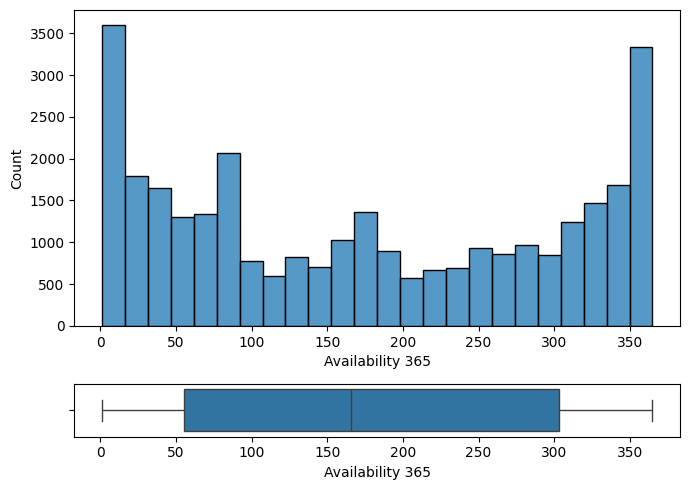

In [59]:
fig, axis = plt.subplots(2, 1, figsize = (7, 5), gridspec_kw={"height_ratios": [6, 1] * 1})

sns.histplot(ax = axis[0], data = train_data_clean, x = "availability_365").set(xlabel = "Availability 365")
sns.boxplot(ax = axis[1], data = train_data_clean, x = "availability_365").set(xlabel = "Availability 365")

plt.tight_layout()
plt.show()

With a cleaner dataset we can observe the values better in the 'availability_365' column.

Step 4: Analysis of multivariate variables

- price / room_type
- price / neighbourhood group
- room_type / neighbourhood_group

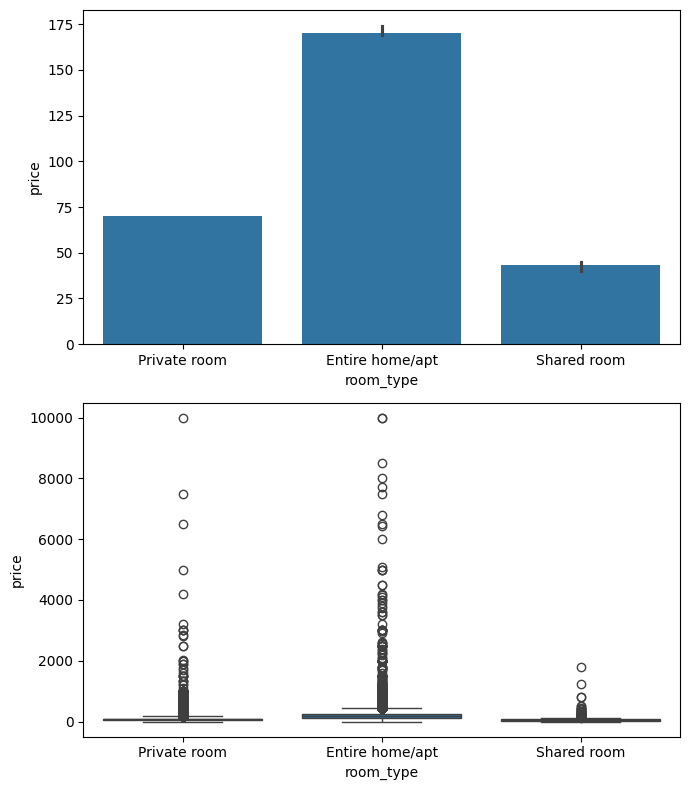

In [60]:
import numpy as np

fig, axis = plt.subplots(2, 1, figsize = (7, 8))

sns.barplot(ax = axis[0], data=train_data_clean, x="room_type", y = "price", estimator=np.median)
sns.boxplot(ax = axis[1], data = train_data_clean, x = "room_type", y = "price")

plt.tight_layout()
plt.show()

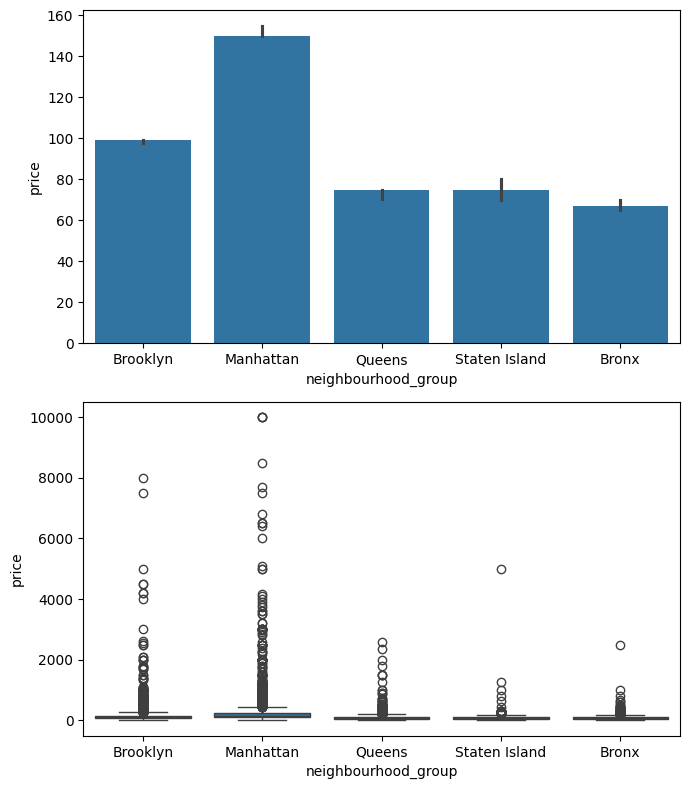

In [61]:
fig, axis = plt.subplots(2, 1, figsize = (7, 8))

sns.barplot(ax = axis[0], data = train_data_clean, x="neighbourhood_group", y = "price", estimator=np.median)
sns.boxplot(ax = axis[1], data = train_data_clean, x = "neighbourhood_group", y = "price")

plt.tight_layout()
plt.show()

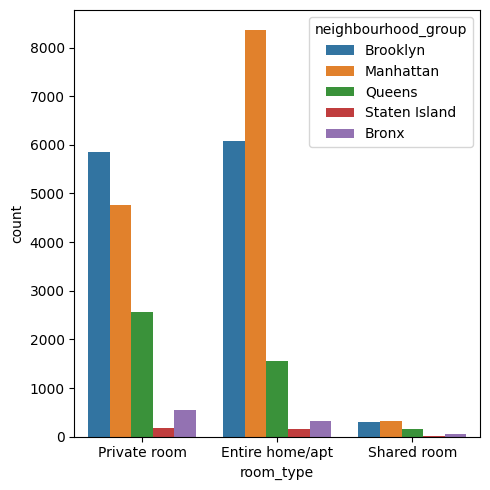

In [62]:
plt.figure(figsize = (5, 5))

sns.countplot(data = train_data_clean, x = "room_type", hue = "neighbourhood_group")

plt.tight_layout()
plt.show()

Prepare the data for a heatmap.

Create a copy of the dataframe and factorize the data to turn it into numbers for better management.

In [63]:
heatmap_df = train_data_clean.copy()

heatmap_df["room_type"] = pd.factorize(heatmap_df["room_type"])[0]
heatmap_df["neighbourhood_group"] = pd.factorize(heatmap_df["neighbourhood_group"])[0]
heatmap_df["neighbourhood"] = pd.factorize(heatmap_df["neighbourhood"])[0]

show the heatmap.

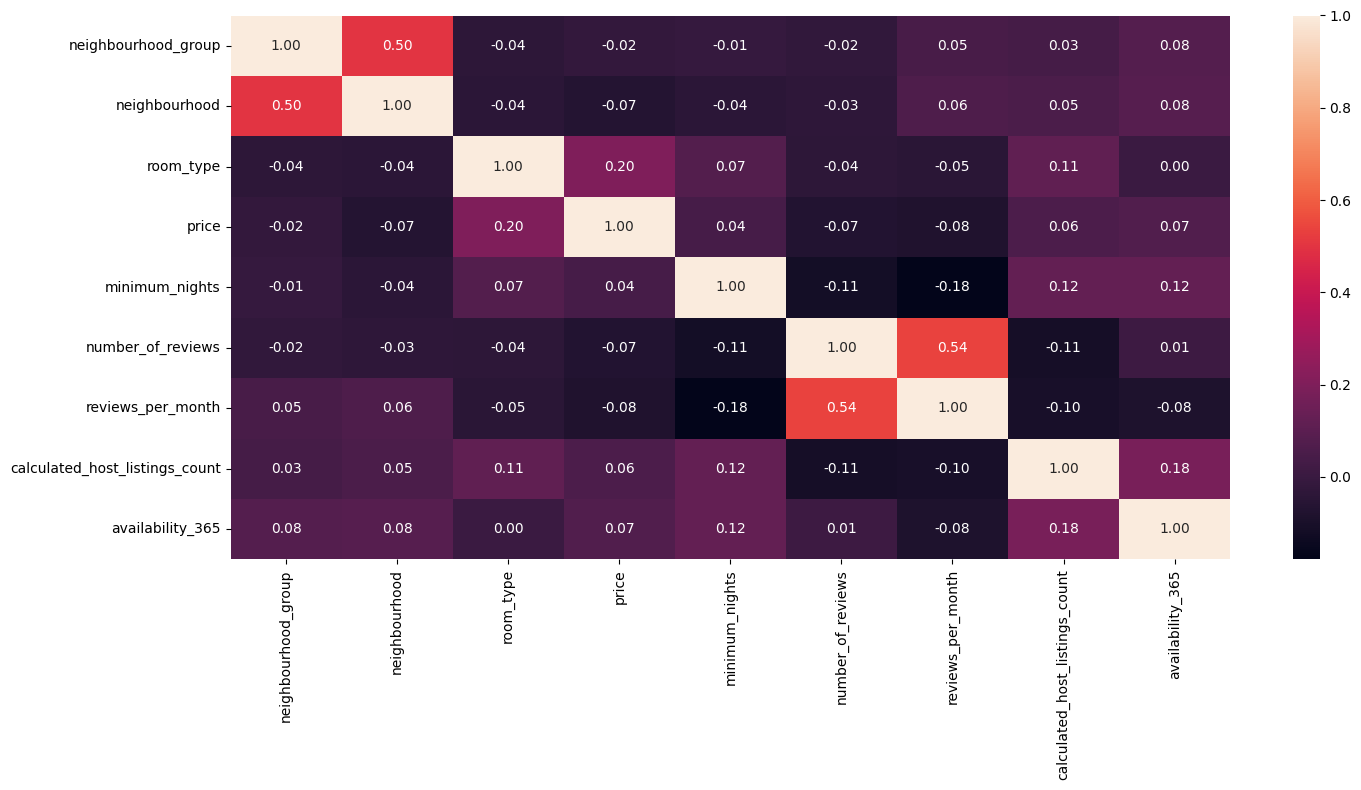

In [64]:
fig, axes = plt.subplots(figsize = (15, 8))

sns.heatmap(heatmap_df[["neighbourhood_group", "neighbourhood", "room_type", "price", "minimum_nights",	"number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.show()


The stronger negative relationships are between minimum nights and reviews per month.

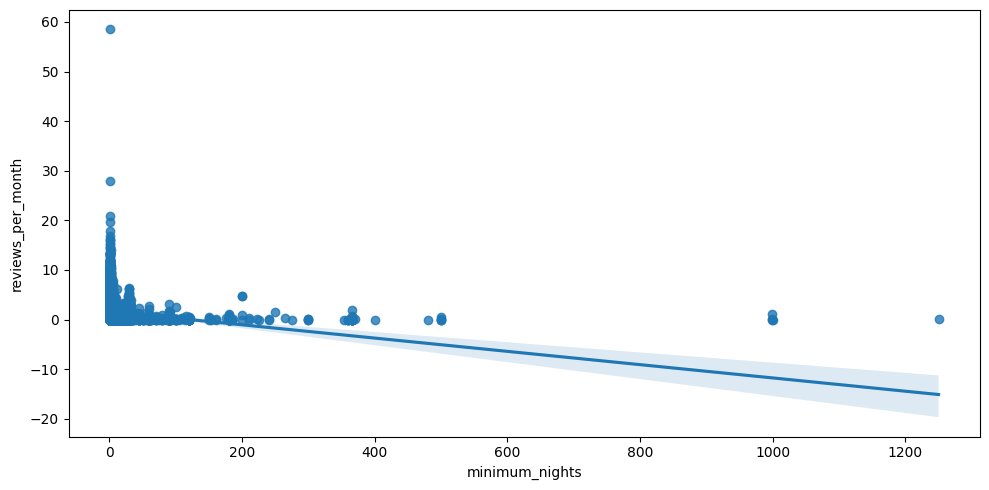

In [65]:
plt.figure(figsize = (10, 5))
sns.regplot(data = heatmap_df, x = "minimum_nights", y = "reviews_per_month")

plt.tight_layout()
plt.show()

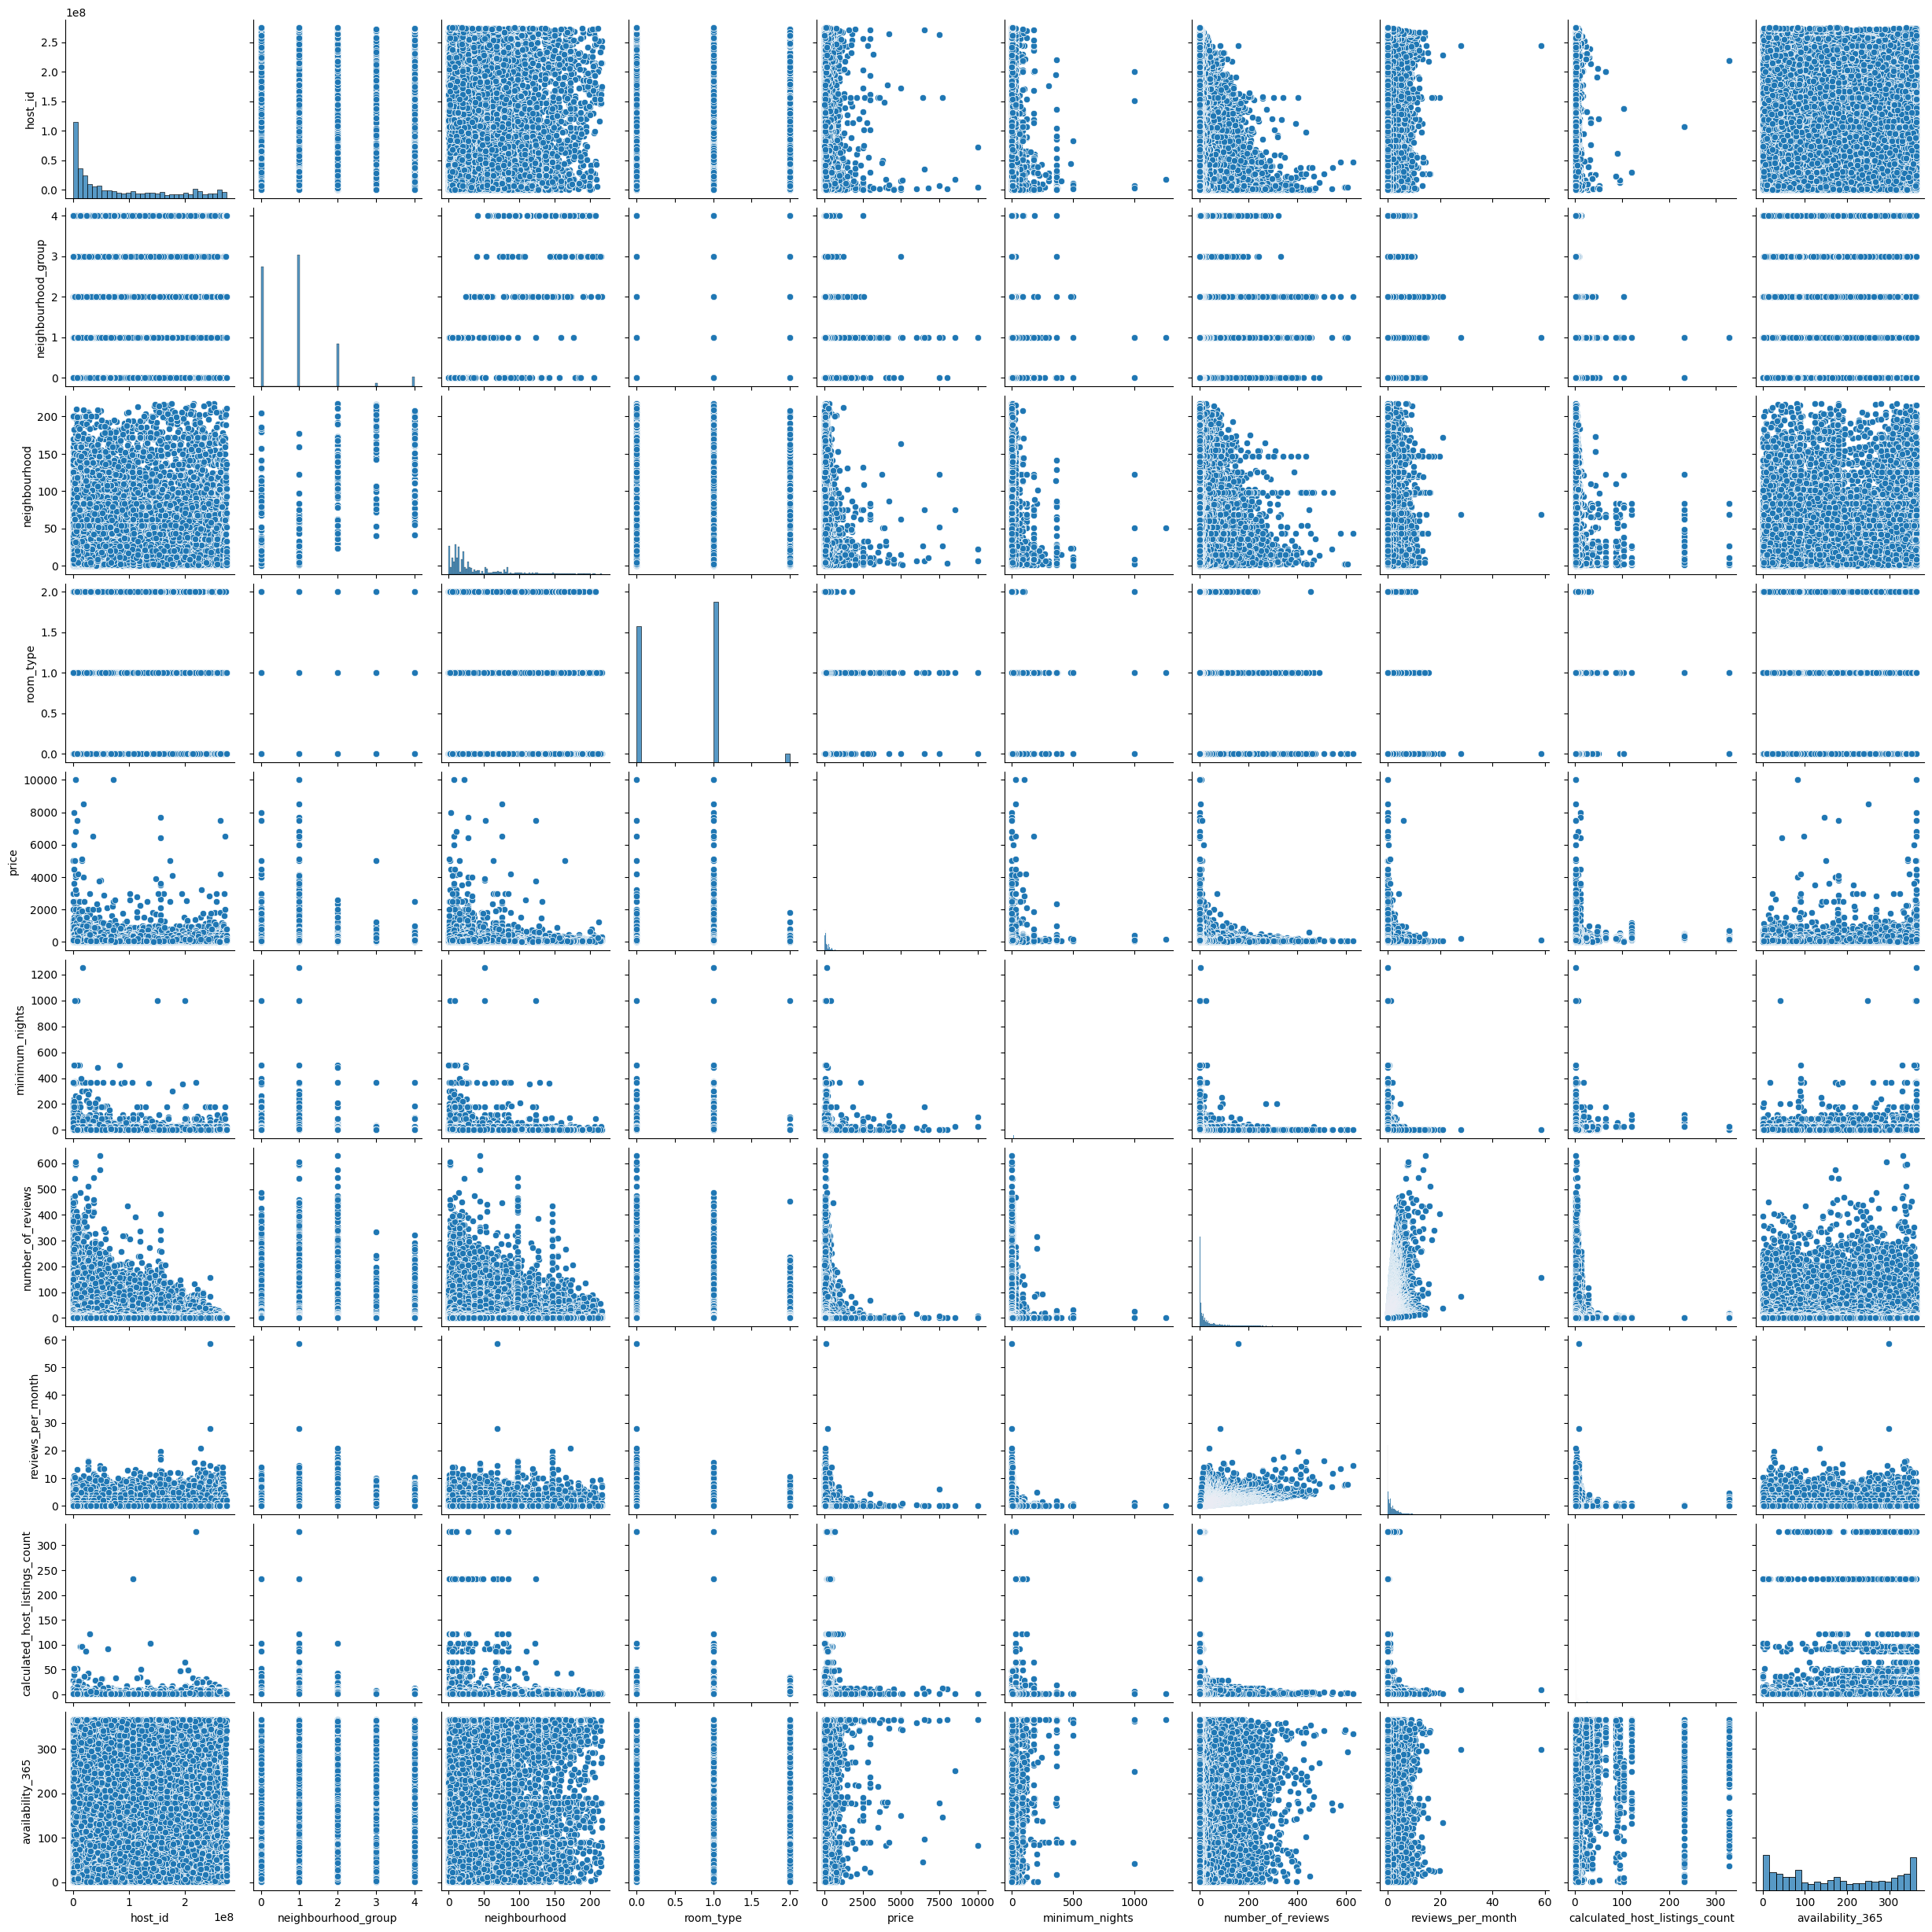

In [66]:
sns.pairplot(data = heatmap_df)

Step 5: Feature engineering

In [67]:
heatmap_df.describe()

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.120400e+04,31204.000000,31204.000000,31204.000000,31204.000000,31204.000000,31204.000000,31204.000000,31204.000000,31204.000000
mean,8.120841e+07,0.854057,33.878093,0.581752,161.726702,8.274099,32.013203,1.517135,10.121010,175.149404
std,8.662457e+07,0.902009,38.116118,0.545951,254.659949,23.861102,51.717749,1.782584,40.397095,125.971183
min,2.571000e+03,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,8.536118e+06,0.000000,9.000000,0.000000,70.000000,2.000000,2.000000,0.180000,1.000000,55.000000
50%,4.089564e+07,1.000000,19.000000,1.000000,110.000000,3.000000,10.000000,0.930000,1.000000,166.000000
75%,1.441974e+08,1.000000,44.000000,1.000000,188.250000,5.000000,39.000000,2.350000,3.000000,303.000000
max,2.743213e+08,4.000000,217.000000,2.000000,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


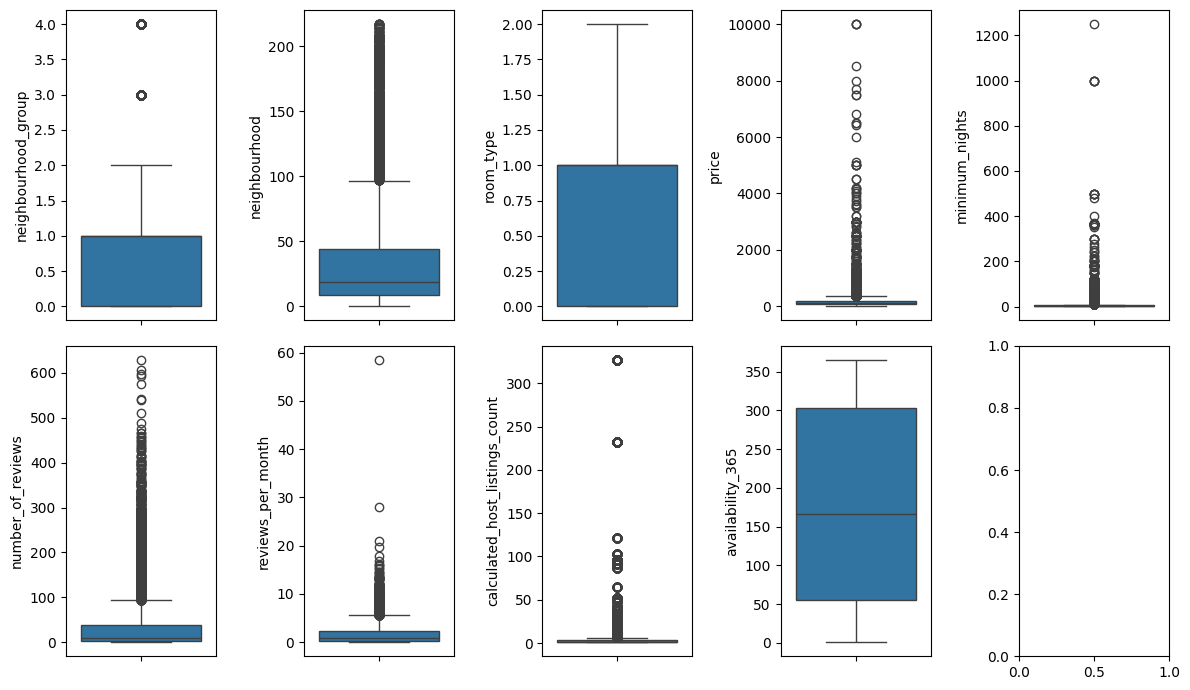

In [68]:
fig, axis = plt.subplots(2, 5, figsize = (12, 7))

#sns.boxplot(ax = axis[0, 0], data = heatmap_df, y = "host_id")
sns.boxplot(ax = axis[0, 0], data = heatmap_df, y = "neighbourhood_group")
sns.boxplot(ax = axis[0, 1], data = heatmap_df, y = "neighbourhood")
sns.boxplot(ax = axis[0, 2], data = heatmap_df, y = "room_type")
sns.boxplot(ax = axis[0, 3], data = heatmap_df, y = "price")
sns.boxplot(ax = axis[0, 4], data = heatmap_df, y = "minimum_nights")
sns.boxplot(ax = axis[1, 0], data = heatmap_df, y = "number_of_reviews")
sns.boxplot(ax = axis[1, 1], data = heatmap_df, y = "reviews_per_month")
sns.boxplot(ax = axis[1, 2], data = heatmap_df, y = "calculated_host_listings_count")
sns.boxplot(ax = axis[1, 3], data = heatmap_df, y = "availability_365")

plt.tight_layout()

plt.show()

Posible outliers:

- price -> max value is $10.000, could be the most expensive price or an error, also the mean is $161.73 and the std is $254.66, which is a high std.
- minimum_nights -> the max is 1250 nights which is likely to be a mistake since it's a unrealistic value.
- number_of_reviews -> most listings have far less reviews so we'll treat the max value of 629 as an outlier
- reviews_per_month -> same as with number_of_reviews, 58.5 is far higher than the rest so we'll also treat it as an outlier
- calculated_host_listings_count -> the max value of 327 could indicate a large company for hosting, since I'm focusing the EDA to individual hosts we'll treat the value as an outlier

In [69]:
price_stats = heatmap_df["price"].describe()
price_stats

count    31204.000000
mean       161.726702
std        254.659949
min          0.000000
25%         70.000000
50%        110.000000
75%        188.250000
max      10000.000000
Name: price, dtype: float64

In [70]:
minimum_nights_stats = heatmap_df["minimum_nights"].describe()
minimum_nights_stats

count    31204.000000
mean         8.274099
std         23.861102
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [71]:
number_of_reviews_stats = heatmap_df["number_of_reviews"].describe()
number_of_reviews_stats

count    31204.000000
mean        32.013203
std         51.717749
min          0.000000
25%          2.000000
50%         10.000000
75%         39.000000
max        629.000000
Name: number_of_reviews, dtype: float64

In [72]:
reviews_per_month_stats = heatmap_df["reviews_per_month"].describe()
reviews_per_month_stats

count    31204.000000
mean         1.517135
std          1.782584
min          0.000000
25%          0.180000
50%          0.930000
75%          2.350000
max         58.500000
Name: reviews_per_month, dtype: float64

In [73]:
listings_count_stats = heatmap_df["calculated_host_listings_count"].describe()
listings_count_stats

count    31204.000000
mean        10.121010
std         40.397095
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

We'll deal with the outliers by capping them to a threshold.

- 1st obtain the upper and lower limits

In [74]:
#
#       PRICE
#
price_iqr = price_stats["75%"] - price_stats["25%"]

price_upper_limit = price_stats["75%"] + 1.5 * price_iqr
price_lower_limit = price_stats["25%"] - 1.5 * price_iqr

print(f'Price upper limit: {round(price_upper_limit, 2)}')
print(f'Price lower limit: {round(price_lower_limit, 2)} \n')

#
#       MINIMUM NIGHTS
#
min_nights_iqr = minimum_nights_stats["75%"] - minimum_nights_stats["25%"]

min_nights_upper_limit = minimum_nights_stats["75%"] + 1.5 * min_nights_iqr
min_nights_lower_limit = minimum_nights_stats["25%"] - 1.5 * min_nights_iqr

print(f'Min nights upper limit: {round(min_nights_upper_limit, 2)}')
print(f'Min nights lower limit: {round(min_nights_lower_limit, 2)} \n')

#
#       NUMBER OF REVIEWS
#
number_of_reviews_iqr = number_of_reviews_stats["75%"] - number_of_reviews_stats["25%"]

number_of_reviews_upper_limit = number_of_reviews_stats["75%"] + 1.5 * number_of_reviews_iqr
number_of_reviews_lower_limit = number_of_reviews_stats["25%"] - 1.5 * number_of_reviews_iqr

print(f'Nº reviews upper limit: {round(number_of_reviews_upper_limit, 2)}')
print(f'Nº reviews lower limit: {round(number_of_reviews_lower_limit, 2)} \n')

#
#       REVIEWS PER MONTH
#
reviews_per_month_iqr = reviews_per_month_stats["75%"] - reviews_per_month_stats["25%"]

reviews_per_month_upper_limit = reviews_per_month_stats["75%"] + 1.5 * reviews_per_month_iqr
reviews_per_month_lower_limit = reviews_per_month_stats["25%"] - 1.5 * reviews_per_month_iqr

print(f'Reviews per month upper limit: {round(reviews_per_month_upper_limit, 2)}')
print(f'Reviews per month lower limit: {round(reviews_per_month_lower_limit, 2)} \n')

#
#       LISTING COUNT
#
listings_count_iqr = listings_count_stats["75%"] - listings_count_stats["25%"]

listings_count_upper_limit = listings_count_stats["75%"] + 1.5 * listings_count_iqr
listings_count_lower_limit = listings_count_stats["25%"] - 1.5 * listings_count_iqr

print(f'Listing count upper limit: {round(listings_count_upper_limit, 2)}')
print(f'Listing count lower limit: {round(listings_count_lower_limit, 2)} \n')

Price upper limit: 365.62
Price lower limit: -107.38 

Min nights upper limit: 9.5
Min nights lower limit: -2.5 

Nº reviews upper limit: 94.5
Nº reviews lower limit: -53.5 

Reviews per month upper limit: 5.6
Reviews per month lower limit: -3.08 

Listing count upper limit: 6.0
Listing count lower limit: -2.0 



- 2nd cap the values to the upper and lower limit if needed

In [75]:
#
#       PRICE
#
heatmap_df['price'] = heatmap_df['price'].apply(
    lambda x: min(x, price_upper_limit) if x > price_upper_limit else x
)

#
#       MINIMUM NIGHTS
#
heatmap_df['minimum_nights'] = heatmap_df['minimum_nights'].apply(
    lambda x: min(x, min_nights_upper_limit) if x > min_nights_upper_limit else x
)

#
#       NUMBER OF REVIEWS
#
heatmap_df['number_of_reviews'] = heatmap_df['number_of_reviews'].apply(
    lambda x: min(x, number_of_reviews_upper_limit) if x > number_of_reviews_upper_limit else x
)

#
#       REVIEWS PER MONTH
#
heatmap_df['reviews_per_month'] = heatmap_df['reviews_per_month'].apply(
    lambda x: min(x, reviews_per_month_upper_limit) if x > reviews_per_month_upper_limit else x
)

#
#       LISTING COUNTS
#
heatmap_df['calculated_host_listings_count'] = heatmap_df['calculated_host_listings_count'].apply(
    lambda x: min(x, listings_count_upper_limit) if x > listings_count_upper_limit else x
)

Check the changes, max value should be the upper limit, so we've capped the data to stay within reasonable thresholds.

In [76]:
price_stats = heatmap_df["price"].describe()
price_stats

count    31204.000000
mean       140.391012
std         91.784736
min          0.000000
25%         70.000000
50%        110.000000
75%        188.250000
max        365.625000
Name: price, dtype: float64

In [77]:
minimum_nights_stats = heatmap_df["minimum_nights"].describe()
minimum_nights_stats

count    31204.000000
mean         3.782480
std          3.034034
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max          9.500000
Name: minimum_nights, dtype: float64

In [78]:
number_of_reviews_stats = heatmap_df["number_of_reviews"].describe()
number_of_reviews_stats

count    31204.000000
mean        25.604858
std         31.539327
min          0.000000
25%          2.000000
50%         10.000000
75%         39.000000
max         94.500000
Name: number_of_reviews, dtype: float64

In [79]:
reviews_per_month_stats = heatmap_df["reviews_per_month"].describe()
reviews_per_month_stats

count    31204.000000
mean         1.461820
std          1.553851
min          0.000000
25%          0.180000
50%          0.930000
75%          2.350000
max          5.605000
Name: reviews_per_month, dtype: float64

In [80]:
listings_count_stats = heatmap_df["calculated_host_listings_count"].describe()
listings_count_stats

count    31204.000000
mean         2.246186
std          1.801042
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max          6.000000
Name: calculated_host_listings_count, dtype: float64

Missing value analysis

In [81]:
heatmap_df.isnull().sum().sort_values(ascending=False)

host_id                           0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

All values are correctly matched, no missing values.

In [82]:
heatmap_df.describe()

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.120400e+04,31204.000000,31204.000000,31204.000000,31204.000000,31204.000000,31204.000000,31204.000000,31204.000000,31204.000000
mean,8.120841e+07,0.854057,33.878093,0.581752,140.391012,3.782480,25.604858,1.461820,2.246186,175.149404
std,8.662457e+07,0.902009,38.116118,0.545951,91.784736,3.034034,31.539327,1.553851,1.801042,125.971183
min,2.571000e+03,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,8.536118e+06,0.000000,9.000000,0.000000,70.000000,2.000000,2.000000,0.180000,1.000000,55.000000
50%,4.089564e+07,1.000000,19.000000,1.000000,110.000000,3.000000,10.000000,0.930000,1.000000,166.000000
75%,1.441974e+08,1.000000,44.000000,1.000000,188.250000,5.000000,39.000000,2.350000,3.000000,303.000000
max,2.743213e+08,4.000000,217.000000,2.000000,365.625000,9.500000,94.500000,5.605000,6.000000,365.000000


Feature scaling

In [83]:
from sklearn.model_selection import train_test_split

min_max_df = heatmap_df.copy()

num_variables = ["neighbourhood_group", "neighbourhood", "room_type", "price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count"]

X = min_max_df[num_variables].drop("price", axis = 1)
y = min_max_df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

display(X_train)



,neighbourhood_group,neighbourhood,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count
24224,3,156,1,9.5,61.0,2.60,1.0
6037,1,7,0,2.0,94.5,2.00,1.0
38542,0,10,0,2.0,28.0,3.94,1.0
47724,0,20,1,2.0,0.0,0.00,3.0
6445,0,20,0,3.0,41.0,0.81,1.0
...,...,...,...,...,...,...,...
47462,0,108,0,1.0,1.0,1.00,6.0
8643,1,13,0,2.0,32.0,0.64,5.0
1070,0,96,0,5.0,94.5,1.21,3.0
29702,1,2,0,1.0,1.0,0.06,6.0


Min-Max Scaling

In [84]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
scaled_data = min_max_scaler.fit_transform(min_max_df[num_variables])
scaled_df = pd.DataFrame(scaled_data, index = min_max_df.index, columns = num_variables)

scaled_df["price"] = heatmap_df["price"]

scaled_df.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count
0,0.00,0.000000,0.0,149.0,0.000000,0.095238,0.037467,1.0
1,0.25,0.004608,0.5,225.0,0.000000,0.476190,0.067797,0.2
2,0.25,0.009217,0.0,150.0,0.235294,0.000000,0.000000,0.0
3,0.00,0.013825,0.5,89.0,0.000000,1.000000,0.827832,0.0
5,0.25,0.018433,0.5,200.0,0.235294,0.783069,0.105263,0.0


Step 6: Feature selection

In [85]:
from sklearn.feature_selection import f_classif, SelectKBest

selection_model = SelectKBest(f_classif,k = 5)
selection_model.fit(X_train, y_train)

selected_features = X_train.columns[selection_model.get_support()]

X_train_selected = selection_model.transform(X_train)
X_test_selected = selection_model.transform(X_test)

X_train_selected = pd.DataFrame(X_train_selected, columns=selected_features, index=X_train.index)
X_test_selected = pd.DataFrame(X_test_selected, columns=selected_features, index=X_test.index)

X_train_selected.head()

,neighbourhood,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count
24224,156.0,1.0,9.5,61.0,1.0
6037,7.0,0.0,2.0,94.5,1.0
38542,10.0,0.0,2.0,28.0,1.0
47724,20.0,1.0,2.0,0.0,3.0
6445,20.0,0.0,3.0,41.0,1.0


In [86]:
scaled_df.to_csv("/workspaces/machine-learning-python-template/data/processed/PROCESSED_AB_NYC_2019.csv", index=False)